In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


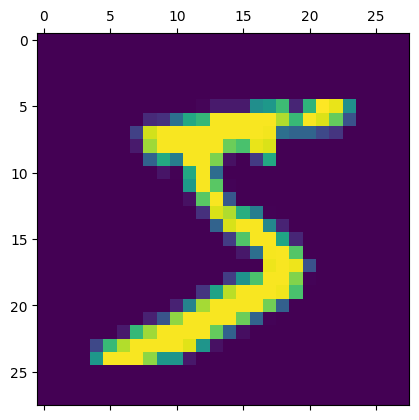

In [3]:
plt.matshow(X_train[0])


In [28]:
X_train_flatten = X_train.reshape(-1, 28, 28, 1)
X_test_flatten = X_test.reshape(-1, 28, 28, 1)
X_train_flatten = X_train_flatten / 255.0
X_test_flatten = X_test_flatten / 255.0

In [29]:
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))

    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))

    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [30]:
model = CNN()


In [31]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1_1 (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1_2 (Conv2D)                  │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 26, 26, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (Activation)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2d_1 (MaxPooling2D)                │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_1 (Dropout)                     │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2_1 (Conv2D)                  │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2_2 (Conv2D)                  │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 11, 11, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (Activation)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp2d_2 (MaxPooling2D)                │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ drop_2 (Dropout)                     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         160,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,486 (884.71 KB)

 Trainable params: 226,294 (883.96 KB)

 Non-trainable params: 192 (768.00 B)

In [34]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=5, verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9832 - loss: 0.0544 - val_accuracy: 0.9889 - val_loss: 0.0319
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9862 - loss: 0.0435 - val_accuracy: 0.9870 - val_loss: 0.0388
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9884 - val_loss: 0.0365
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9912 - val_loss: 0.0266
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9927 - val_loss: 0.0242


In [51]:
Y_pred=model.predict( X_test_flatten)

Y_pred_label=[np.argmax(i) for i in Y_pred]
Y_test_label=[np.argmax(i) for i in Y_test]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
cm=tf.math.confusion_matrix(Y_test_label, Y_pred_label)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1032,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  892,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  958,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1028,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  974,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

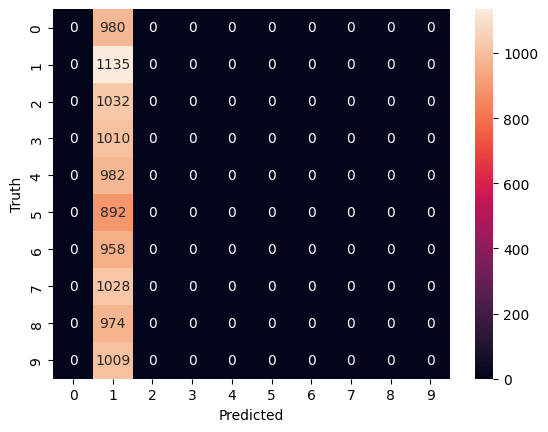

In [53]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

the value is: 7


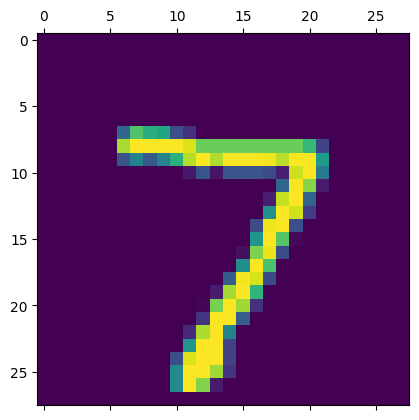

In [55]:
plt.matshow(X_test[0])
print("the value is:", Y_test_label[0])